# Problem Statement.
## Given a comment classify it into toxic or non-toxic. Here toxic means comments that are unacceptable to a person or a community.

## This project was inspired from the jigsaw unintended bias toxic comment classification which was hosted on kaggle.

# The problem that we are solving here.
## Background : 
### This problem was also solved earlier but there was a problem with the system . The system was a bit biased towards the use of unparliamentary/abusive words.
### For example a sentence "I am a gay" or "I am a black man." were classified as toxic comments. 
### Therefore the challenge was to get rid of this bias. To solve this problem a new metric was introduced by jigsaw. This metric also considers the identity of the person about whom the comment is made. You can get into  the details of the metric on the below link.
<a href="https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview/evaluation">Click Here</a>


# Exploratory  Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Loading Dataset

In [0]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/train.csv")
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [0]:
#print(df.shape)
#df = df.sample(500000)
print(df.shape)

(1804874, 45)


In [0]:
df = df.drop_duplicates(subset={'comment_text'},keep='first')
df.shape

(1780823, 45)

### Looking the absuive words used in the comments.

In [0]:
# Lets find the words that contains letters or character that are not present in english
import re
from tqdm import tqdm

non_eng_words = {}
pattern = re.compile(r'([fadpbit]{1,4}[*]{1,4}[ingkscyhabd]{1,4})')

for sent in tqdm(df['comment_text'].values):
    sent = re.sub(r'[^a-zA-Z* ]',' ',sent)
    for wrd in sent.split():
        if(re.match(pattern,wrd) and len(wrd)>2):
            if(non_eng_words.get(wrd,-1)<0):
                non_eng_words[wrd] = 1
            else:
                non_eng_words[wrd] += 1

100%|██████████| 1780823/1780823 [01:58<00:00, 15073.35it/s]


In [0]:
# Now we will store these words and their counts in a list.
wrds = []
counts = []
for wrd in sorted(non_eng_words, key=non_eng_words.get, reverse=True):
    if(len(wrd)<30):
        wrds.append(wrd)
        counts.append(non_eng_words[wrd])
print("Number of aabusive words wused are ".format(len(non_eng_words)))
        
## Abusive words present in the comments.
for i in range(len(wrds)):
    print(wrds[i],"->",counts[i])

Number of aabusive words wused are 
p***y -> 73
p*ssy -> 65
f**k -> 45
a**hole -> 38
f*ck -> 29
a**holes -> 27
p*ss -> 25
f*cking -> 18
f***ing -> 17
f**king -> 15
p*ssed -> 13
p**sy -> 13
a*s -> 10
f**ked -> 10
b***h -> 9
f*cked -> 8
d*ck -> 7
p**s -> 7
p*ssie -> 6
p*ssing -> 6
a**clown -> 6
bit*h -> 5
d**k -> 5
b**ch -> 5
f*cks -> 4
p**y -> 4
d****d -> 3
p***ing -> 3
pi*s -> 3
p***ies -> 3
p*nis -> 3
b*itch -> 3
d**n -> 3
d**ks -> 3
b*stards -> 3
f**cker -> 3
p****y -> 3
a**clowns -> 3
p****d -> 2
pi**ing -> 2
bi*ch -> 2
a*sholes -> 2
f**ks -> 2
f*k -> 2
a*se -> 2
f***in -> 2
f***n -> 2
d*amn -> 2
f**kin -> 2
p*ss* -> 2
p*ssies -> 2
f****d -> 2
f****ing -> 2
a**hats -> 2
b***s -> 2
p*sses -> 2
p*ss*ng -> 2
f***king -> 2
b*stard -> 2
p*s*y -> 2
f*ckers -> 2
d*ckhead -> 2
f****s -> 2
a***holes -> 2
a*holes -> 2
t**d -> 2
f*ckin -> 1
b**ching -> 1
a*a* -> 1
f*c*ing -> 1
bat*hit -> 1
f***g -> 1
d***s -> 1
a*shole -> 1
p****s -> 1
b*sta*ds -> 1
p**s* -> 1
p****ies -> 1
b*gg*r -> 1
f*c*kin

### Data Cleaning

In [0]:

# Ref: https://www.kaggle.com/haqishen/jigsaw-predict
# We are creating a dict with shortened word as key and actual word as value.
apostophe_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                  "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                  "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is",
                  "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would",
                  "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have",
                  "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                  "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
                  "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                  "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                  "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                  "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                  "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                  "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                  "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                  "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                  "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                  "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                  "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                  "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                  "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                  "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                  "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
                  "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                  "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                  "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                  "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                  "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would",
                  "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
                  "you've": "you have" }


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import re

def process_sent(sent):
    line = ''
    for wrd in sent.split():
        if(len(apostophe_dict.get(wrd.lower(),'n'))>1 and wrd.lower() not in stopwords and len(wrd)>2):
            wrd = apostophe_dict[wrd.lower()]
            n_wrd = ''
            for w in wrd.split():
                if(w not in stopwords):
                    n_wrd += " "+w
            line += " "+n_wrd
        else:
            line += " "+ wrd.lower()    
    line = re.sub(r'[^a-zA-Z* ]',' ',line)
    return line

In [0]:
# Preprocessing the comments.
preprocessed_data = []
from tqdm import tqdm
for sent in tqdm(df['comment_text'].values):
    sent = process_sent(sent)
    line = ''
    for wrd in sent.split():
        if(len(wrd)>2):
            line += " " +wrd.lower()
    line = re.sub(r"[']",'',line)
    preprocessed_data.append(line)

100%|██████████| 1780823/1780823 [01:52<00:00, 15806.98it/s]


In [0]:
df['comment_text'] = preprocessed_data

### Splitting data

In [0]:
from sklearn.model_selection import train_test_split
# To train and validate classical machine models use cv datset also. 
Y = df['target'].values
train,test,Y_train,Y_test = train_test_split(df,Y,test_size=0.1,random_state=42)
train,cv,Y_train,Y_cv = train_test_split(train,Y_train,test_size=0.1,random_state=42)
print((train.shape),(test.shape))

(1442466, 45) (178083, 45)


In [0]:
identity_columns = [
        'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
        'muslim', 'black', 'white', 'psychiatric_or_mental_illness']


In [0]:
import numpy as np
seed = 1029

train_x = train['comment_text'].fillna('_##_').values
test_x = test['comment_text'].fillna('_##_').values
cv_x = cv['comment_text'].fillna('_##_').values

# For gtrain
weights = np.ones((len(train),))
weights += train[identity_columns].fillna(0).values.sum(axis=1) * 3
weights += train['target'].values * 8
weights /= weights.max()
train_y = np.vstack([train['target'], weights]).T   
train_y_identity = train[identity_columns].values

# For test
weights = np.ones((len(test),))
weights += test[identity_columns].fillna(0).values.sum(axis=1) * 3
weights += test['target'].values * 8
weights /= weights.max()
test_y = np.vstack([test['target'], weights]).T   
test_y_identity = test[identity_columns].values

# For cv
weights = np.ones((len(cv),))
weights += cv[identity_columns].fillna(0).values.sum(axis=1) * 3
weights += cv['target'].values * 8
weights /= weights.max()
cv_y = np.vstack([cv['target'], weights]).T    
cv_y_identity = cv[identity_columns].values

# shuffling the data
np.random.seed(seed)
train_idx = np.random.permutation(len(train_x))
test_idx = np.random.permutation(len(test_x))
cv_idx = np.random.permutation(len(cv_x))

train_x = train_x[train_idx]
train_y = train_y[train_idx]
train_y_identity = train_y_identity[train_idx]


test_x = test_x[test_idx]
test_y = test_y[test_idx]
test_y_identity = test_y_identity[test_idx]


cv_x = cv_x[cv_idx]
cv_y = cv_y[cv_idx]
cv_y_identity = cv_y_identity[cv_idx]

In [0]:
y_binary = (test_y[:, 0] >= 0.5).astype(int)
y_identity_binary = (test_y_identity >= 0.5).astype(int)
y_identity_binary.shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


(178083, 9)

In [0]:
Y_train = (train_y[:,0]>=0.5).astype(int)
Y_cv = (cv_y[:,0]>=0.5).astype(int)
Y_test = (test_y[:,0]>=0.5).astype(int)
print(Y_train.shape, Y_cv.shape)


(1442466,) (160274,)


### Custom metric given by *Kaggle*

In [0]:
# This metric code below was taken from kaggle 
from sklearn.metrics import roc_auc_score
import keras.backend as K
class JigsawEvaluator:
    
    def __init__(self, y_binary, y_identity_binary, power=-5, overall_model_weight=0.25):
        self.y = y_binary
        self.y_i = y_identity_binary
        self.n_subgroups = self.y_i.shape[1]
        self.power = power
        self.overall_model_weight = overall_model_weight
        
    @staticmethod
    def _compute_auc(y_true, y_pred):
        try:
            return roc_auc_score(y_true, y_pred)
        except ValueError:
            return np.nan
        
    def _compute_subgroup_auc(self, i, y_pred):
        mask = self.y_i[:, i] == 1
        return self._compute_auc(self.y[mask], y_pred[mask])
        
    def _compute_bpsn_auc(self, i, y_pred):
        mask = self.y_i[:, i] + self.y == 1
        return self._compute_auc(self.y[mask], y_pred[mask])
        
    def _compute_bnsp_auc(self, i, y_pred):
        mask = self.y_i[:, i] + self.y != 1
        return self._compute_auc(self.y[mask], y_pred[mask])
      
    def compute_bias_metrics_for_model(self, y_pred):
        records = np.zeros((3, self.n_subgroups))
        for i in range(self.n_subgroups):
            records[0, i] = self._compute_subgroup_auc(i, y_pred)
            records[1, i] = self._compute_bpsn_auc(i, y_pred)
            records[2, i] = self._compute_bnsp_auc(i, y_pred)
        return records
        
    def _calculate_overall_auc(self, y_pred):
        return roc_auc_score(self.y, y_pred)
        
    def _power_mean(self, array):
        total = sum(np.power(array, self.power))
        return np.power(total / len(array), 1 / self.power)
        
    def get_final_metric(self, y_pred):
        #y_pred = K.flatten(y_pred)
        bias_metrics = self.compute_bias_metrics_for_model(y_pred)
        bias_score = np.average([
            self._power_mean(bias_metrics[0]),
            self._power_mean(bias_metrics[1]),
            self._power_mean(bias_metrics[2])
        ])
        overall_score = self.overall_model_weight * self._calculate_overall_auc(y_pred)
        bias_score = (1 - self.overall_model_weight) * bias_score
        return overall_score + bias_score

Using TensorFlow backend.


In [0]:
def custom_loss(y_true, y_pred):
    return binary_crossentropy(K.reshape(y_true[:,0],(-1,1)), y_pred) * y_true[:,1]

## Vectorizing datset using tfidf

#### vectorizing train dataset

In [0]:
# target with value greater than equal to 0.5 will be assigned 1 and rest 0.
def fun(x):
    if(x>=0.5):
        return 1
    else:
        return 0

In [0]:
labels = df['target']
Y = labels.map(fun)

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(preprocessed_data,Y,test_size=0.2,random_state=42)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)
print(len(X_train),len(X_test),len(X_cv))

1282192 356165 142466


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_features=50000)
train_vect1 = vectorizer.fit_transform(X_train)
test_vect1 = vectorizer.transform(X_test)
cv_vect1 = vectorizer.transform(X_cv)

In [0]:
print(train_vect1.shape)
print(test_vect1.shape)
print(cv_vect1.shape)

(1282192, 50000)
(356165, 50000)
(142466, 50000)


#### vectorizing test dataset

In [0]:
test_df = pd.read_csv("/content/drive/My Drive/Project/test.csv")
test_df.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [0]:
# Preprocessing the comments.
preprocessed_data_test = []
from tqdm import tqdm
for sent in tqdm(test_df['comment_text'].values):
    sent = process_sent(sent)
    line = ''
    for wrd in sent.split():
        if(len(wrd)>2):
            line += " " +wrd.lower()
    #line = re.sub(r"[']",'',line)
    preprocessed_data_test.append(line)
    
# Preparing the test data
test_X = vectorizer.transform(preprocessed_data)

100%|██████████| 97320/97320 [00:05<00:00, 16720.14it/s]


# Training Logistic Regression on tfidf vectorization

### On word unigrams 

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
params = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10,100]
train_auc = []
cv_auc = []
for i in tqdm(params):
    lr = SGDClassifier(loss='log',penalty='l2',tol=0.0001,alpha=i,n_jobs=-1,class_weight='balanced')
    model = CalibratedClassifierCV(lr,cv=5)
    model.fit(train_vect1,Y_train)
    predict_y_train = model.predict_proba(train_vect1)[:,1] # Taking probability for positive class
    t_auc = roc_auc_score(Y_train,predict_y_train)
    predict_y_cv = model.predict_proba(cv_vect1)[:,1]# Taking probability for positve class
    c_auc = roc_auc_score(Y_cv,predict_y_cv)
    train_auc.append(t_auc)
    cv_auc.append(c_auc)


100%|██████████| 10/10 [15:36<00:00, 53.68s/it]


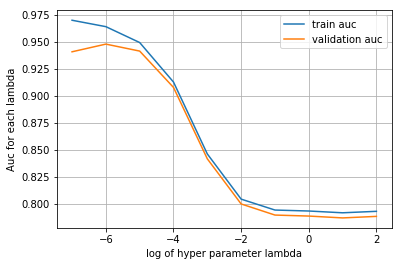

In [0]:
import matplotlib.pyplot as plt
import math as m
para = [m.log10(x) for x in params]
plt.plot(para,train_auc,label='train auc')
plt.plot(para,cv_auc,label='validation auc')
plt.xlabel("log of hyper parameter lambda")
plt.ylabel("Auc for each lambda")
plt.grid()
plt.legend()
plt.show()

In [0]:
lr = SGDClassifier(loss='log',penalty='l2',tol=0.0001,alpha=0.000001,n_jobs=-1)
model = CalibratedClassifierCV(lr,cv=5)
model.fit(train_vect1,Y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-06, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.0001,
                                          

In [0]:
predict_y_test = model.predict_proba(test_vect1)[:,1] # Taking probability for positive class
eval = JigsawEvaluator(y_binary, y_identity_binary)
auc = eval.get_final_metric(predict_y_test)
print("Auc for logistic regression is {}".format(roc_auc_score(Y_test,predict_y_test)))

Auc for logistic regression is 0.9465540641624216


### Training Naive bayes model

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

param = [0.00001,0.0001,0.001,0.01,0.1,1.0,10,100]
train_auc = []
cv_auc = []

for i in tqdm(param):
    model = MultinomialNB(alpha=i)
    model.fit(train_vect1, Y_train)
    predict_y_train = model.predict_log_proba(train_vect1)[:,1] # Taking probability for positive class
    t_auc = roc_auc_score(Y_train,predict_y_train)
    predict_y_cv = model.predict_log_proba(cv_vect1)[:,1]# Taking probability for positve class
    c_auc = roc_auc_score(Y_cv,predict_y_cv)
    train_auc.append(t_auc)
    cv_auc.append(c_auc)


100%|██████████| 8/8 [00:12<00:00,  1.60s/it]


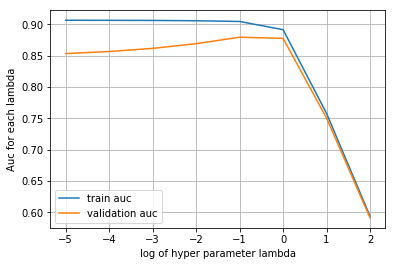

In [0]:
import matplotlib.pyplot as plt
import math as m
para = [m.log10(x) for x in param]
plt.plot(para,train_auc,label='train auc')
plt.plot(para,cv_auc,label='validation auc')
plt.xlabel("log of hyper parameter lambda")
plt.ylabel("Auc for each lambda")
plt.grid()
plt.legend()
plt.show()

In [0]:
model = MultinomialNB(alpha=1)
model.fit(train_vect1, Y_train)
predict_y_test = model.predict_log_proba(test_vect1)[:,1] # Taking probability for positive class
print("Test auc for naive bayes model is {}".format(roc_auc_score(Y_test,predict_y_test)))

Test auc for naive bayes model is 0.8755791924694993


## Using LSTM Models

In [0]:
#downloaded = drive.CreateFile({'id':id}) 
#glove_file = downloaded.GetContentFile('glove.6B.100d.txt') 

f = open("/content/drive/My Drive/Project/glove.6B.300d.txt",'r',encoding="utf-8")

In [0]:
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input
from numpy import asarray
t  = Tokenizer(num_words=40000)
t.fit_on_texts(train_x)
vocab_size = len(t.word_index)+1
# Integer coding all the words.
encoded_essay = t.texts_to_sequences(train_x)
# defining a max size for padding.
max_len = 150
# padding the vectors of each datapoint to fixed length of 600.
train_sequence = pad_sequences(encoded_essay,maxlen = max_len,padding='post')

# Vectorizing test data
# Integer coding all the words.
encoded_essay = t.texts_to_sequences(test_x)
# defining a max size for padding.
max_len = 150
# padding the vectors of each datapoint to fixed length of 600.
test_sequence = pad_sequences(encoded_essay,maxlen = max_len,padding='post')

# to use cv datset un-comment this.

# Vectorizing cv data
# Integer coding all the words.
#encoded_essay = t.texts_to_sequences(cv_x)
# defining a max size for padding.
#max_len = 150
# padding the vectors of each datapoint to fixed length of 600.
#cv_sequence = pad_sequences(encoded_essay,maxlen = max_len,padding='post')


In [0]:
# we will load the whole glove vectors .
embeddings_index1 = {}
# Opening the file
f = open("/content/drive/My Drive/Project/glove.6B.300d.txt",'r',encoding="utf-8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index1[word] = coefs
f.close()


# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import numpy as np
embedding_matrix1 = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  for wrd in [word, word.lower()]:
    if wrd in embedding_matrix1:
	    embedding_matrix1[i] = embeddings_index1.get(wrd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [0]:
#  Loading crawl vectors
from gensim.models import KeyedVectors
path = "/content/drive/My Drive/Project/crawl-300d-2M.gensim"
embeddings_index2 = KeyedVectors.load(path, mmap='r')
embedding_matrix2 = np.zeros((len(t.word_index) + 1, 300))
for word, i in t.word_index.items():
    for candidate in [word, word.lower()]:
        if candidate in embeddings_index2:
            embedding_matrix2[i] = embeddings_index2[candidate]
            break
            
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import numpy as np
embedding_matrix2 = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  for wrd in [word, word.lower()]:
    if wrd in embedding_matrix2:
	    embedding_matrix2[i] = embeddings_index2.get(wrd)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


In [0]:
embedding_matrix = np.concatenate([embedding_matrix1, embedding_matrix2], axis= -1)

In [0]:
embedding_matrix.shape

(252210, 600)

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
test_df = pd.read_csv("/content/drive/My Drive/Project/test.csv")
test_df.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [0]:
# Preprocessing the comments.
test_preprocessed = []
bad_found = []
from tqdm import tqdm
for sent in tqdm(test_df['comment_text'].values):
    sent = process_sent(sent)
    line = ''
    for wrd in sent.split():
        if(len(wrd)>2):
            line += " " +wrd.lower()
    line = re.sub(r"[']",'',line)
    test_preprocessed.append(line)

test_df['comment_text'] = test_preprocessed
test_df.head()

100%|██████████| 97320/97320 [00:05<00:00, 16647.45it/s]


,id,comment_text
0,7097320,integrity means that you pay your debts does ...
1,7097321,this malfeasance the administrator and the bo...
2,7097322,rmiller spoken like true elitist but look out...
3,7097323,paul thank you for your kind words indeed hav...
4,7097324,sorry you missed high school eisenhower sent ...


In [0]:

# Vectorizing test data
# Integer coding all the words.
encoded_essay1 = t.texts_to_sequences(test_df['comment_text'])
# defining a max size for padding.
max_len = 150
# padding the vectors of each datapoint to fixed length of 600.
test_sequence1 = pad_sequences(encoded_essay1,maxlen = max_len,padding='post')

# First Architecture

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import MaxPooling1D
from keras.layers import Flatten, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dropout, BatchNormalization, Input, SpatialDropout1D
from keras.layers import Dense, Bidirectional, concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention
import keras.backend as K

embedding_vector_length = 100
input1 = Input(shape=(150,))
e1 = Embedding(40000,embedding_vector_length, input_length=150)(input1)
x1 = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(e1)
att = SeqSelfAttention(attention_activation='sigmoid')(x1)

x1 = Flatten()(att)
output = Dense(1, activation='sigmoid')(x1)
model = Model(inputs=[input1,], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 150, 100)          4000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 150, 256)          234496    
_________________________________________________________________
seq_self_attention_5 (SeqSel (None, 150, 256)          16449     
_________________________________________________________________
flatten_5 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 38401     
Total params: 4,289,346
Trainable params: 4,289,346
Non-trainable params: 0
_________________________________________________

In [0]:
model.fit(train_sequence, Y_train, nb_epoch=5, batch_size=512, validation_data=(cv_sequence, Y_cv))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1282192 samples, validate on 142466 samples
Epoch 1/5
1282192/1282192 [==============================] - 2665s 2ms/step - loss: 0.1483 - acc: 0.9454 - val_loss: 0.1334 - val_acc: 0.9491
Epoch 2/5
1282192/1282192 [==============================] - 2657s 2ms/step - loss: 0.1256 - acc: 0.9515 - val_loss: 0.1307 - val_acc: 0.9495
Epoch 3/5
1282192/1282192 [==============================] - 2654s 2ms/step - loss: 0.1155 - acc: 0.9552 - val_loss: 0.1330 - val_acc: 0.9494
Epoch 4/5
1282192/1282192 [==============================] - 2659s 2ms/step - loss: 0.1037 - acc: 0.9600 - val_loss: 0.1407 - val_acc: 0.9477
Epoch 5/5
1282192/1282192 [==============================] - 2665s 2ms/step - loss: 0.0924 - acc: 0.9646 - val_loss: 0.1522 - val_acc: 0.9463


In [0]:
# Roc auc
predicted_y = model.predict(test_sequence,batch_size=512)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test,predicted_y))

0.9358755310733398


In [0]:
eval = JigsawEvaluator(y_binary, y_identity_binary)
print(eval.get_final_metric(predicted_y))

0.8823309859591929


In [0]:
y_pre = model.predict(test_sequence1,batch_size=512)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = y_pre
submission.to_csv("submissionNew2.csv",index=False) 


In [0]:
from google.colab import files
files.download( "/content/submissionNew2.csv" )  

## First Bi-LSTM architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import MaxPooling1D
from keras.layers import Flatten, GlobalMaxPool1D
from keras.layers import Dropout, BatchNormalization
from keras.layers import Dense, Bidirectional
from keras.models import Model

embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_shape=(150,)))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(GlobalMaxPllo1D())
model.add(BatchNormalization())
model.add(Dense(768,activation='relu'))
model.add(Dropout(0.50))
model.add(GlobalMaxPllo1D())
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 64)           6223104   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 256)               197632    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 768)               197376    
_________________________________________________________________
dropout_16 (Dropout)         (None, 768)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 768)               3072      
__________

In [0]:
model.fit(train_sequence, Y_train, nb_epoch=5, batch_size=512, validation_data=(cv_sequence, Y_cv))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 190911 samples, validate on 47728 samples
Epoch 1/5
190911/190911 [==============================] - 266s 1ms/step - loss: 0.2945 - acc: 0.8903 - val_loss: 0.2760 - val_acc: 0.8859
Epoch 2/5
190911/190911 [==============================] - 259s 1ms/step - loss: 0.1441 - acc: 0.9477 - val_loss: 0.1511 - val_acc: 0.9442
Epoch 3/5
190911/190911 [==============================] - 258s 1ms/step - loss: 0.1232 - acc: 0.9523 - val_loss: 0.1696 - val_acc: 0.9411
Epoch 4/5
190911/190911 [==============================] - 257s 1ms/step - loss: 0.1061 - acc: 0.9584 - val_loss: 0.1763 - val_acc: 0.9383
Epoch 5/5
190911/190911 [==============================] - 253s 1ms/step - loss: 0.0857 - acc: 0.9663 - val_loss: 0.1948 - val_acc: 0.9394


In [0]:
# Roc auc
predicted_y = model.predict(test_sequence,batch_size=512)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test,predicted_y))


0.9038698075698687


## Second Bi-LSTM architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import MaxPooling1D
from keras.layers import Flatten, GlobalMaxPool1D
from keras.layers import Dropout, BatchNormalization, Input
from keras.layers import Dense, Bidirectional, concatenate
from keras.models import Model
from keras.optimizers import Adam

embedding_vector_length = 100
input1 = Input(shape=(150,))
x1 = Embedding(vocab_size,embedding_vector_length, input_length=150)(input1)
x1 = Bidirectional(LSTM(200,return_sequences=True))(x1)
x1 = Dropout(0.3)(x1)
x1 = GlobalMaxPool1D()(x1)

#input2 = Input(shape=(150,))
x2 = Embedding(vocab_size,embedding_vector_length, input_length=150)(input1)
x2 = Bidirectional(LSTM(200,return_sequences=True))(x2)
x2 = Dropout(0.5)(x2)
x2 = GlobalMaxPool1D()(x2)

x = concatenate([x1, x2])
x = Dense(75, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)
model3 = Model(inputs=[input1,], outputs = output)
#adam = Adam(lr=0.0001)
model3.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 150, 100)     40000000    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 150, 100)     40000000    input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 150, 400)     481600      embedding_5[0][0]                
____________________________________________________________________________________________

In [0]:
model3.fit(train_sequence, Y_train, epochs=4, batch_size=512, validation_data=[cv_sequence, Y_cv])

Train on 1282192 samples, validate on 142466 samples
Epoch 1/4
1282192/1282192 [==============================] - 4279s 3ms/step - loss: 0.1440 - acc: 0.9459 - val_loss: 0.1568 - val_acc: 0.9472
Epoch 2/4
1282192/1282192 [==============================] - 4267s 3ms/step - loss: 0.1159 - acc: 0.9536 - val_loss: 0.1421 - val_acc: 0.9489
Epoch 3/4
1282192/1282192 [==============================] - 4268s 3ms/step - loss: 0.0956 - acc: 0.9610 - val_loss: 0.1463 - val_acc: 0.9430
Epoch 4/4
1282192/1282192 [==============================] - 4270s 3ms/step - loss: 0.0711 - acc: 0.9714 - val_loss: 0.1569 - val_acc: 0.9380


In [0]:
# Roc auc
predicted_y = model3.predict(test_sequence,batch_size=512)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test,predicted_y))


0.9373771542809413


In [0]:
y_pre = model3.predict(test_sequence1,batch_size=512)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = y_pre
submission.to_csv("submission11.csv",index=False) 


In [0]:
from google.colab import files
files.download( "/content/submission11.csv" )  

## Third Bi-LSTM architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import MaxPooling1D
from keras.layers import Flatten, GlobalMaxPool1D
from keras.layers import Dropout, BatchNormalization, Input
from keras.layers import Dense, Bidirectional, concatenate
from keras.models import Model
from keras.optimizers import Adam

embedding_vector_length = 100
input1 = Input(shape=(150,))
x1 = Embedding(vocab_size,embedding_vector_length, input_length=150)(input1)
x1 = Bidirectional(LSTM(128,return_sequences=True))(x1)
x1 = GlobalMaxPool1D()(x1)


x2 = Embedding(vocab_size,embedding_vector_length, input_length=150)(input1)
x2 = Bidirectional(LSTM(128,return_sequences=True))(x2)
x2 = GlobalMaxPool1D()(x2)

x = concatenate([x1, x2])
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
output = Dense(1, activation='sigmoid')(x)
model4 = Model(inputs=[input1,], outputs = output)
#adam = Adam(lr=0.0001)
model4.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model4.summary()

W0830 05:13:28.912689 139808314402688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 05:13:28.966059 139808314402688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 05:13:28.973107 139808314402688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 05:13:30.026833 139808314402688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0830 05:13:30.035221 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 150, 100)     40000000    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 150, 100)     40000000    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 150, 256)     234496      embedding_1[0][0]                
____________________________________________________________________________________________

In [0]:
model4.fit(train_sequence, Y_train, epochs=4, batch_size=512, validation_data=[cv_sequence, Y_cv])

Train on 1282192 samples, validate on 142466 samples
Epoch 1/4
1282192/1282192 [==============================] - 3407s 3ms/step - loss: 0.1435 - acc: 0.9465 - val_loss: 0.1267 - val_acc: 0.9496
Epoch 2/4
1282192/1282192 [==============================] - 3402s 3ms/step - loss: 0.1150 - acc: 0.9541 - val_loss: 0.1284 - val_acc: 0.9495
Epoch 3/4
1282192/1282192 [==============================] - 3397s 3ms/step - loss: 0.0936 - acc: 0.9622 - val_loss: 0.1432 - val_acc: 0.9477
Epoch 4/4
1282192/1282192 [==============================] - 3387s 3ms/step - loss: 0.0662 - acc: 0.9737 - val_loss: 0.1730 - val_acc: 0.9422


In [0]:
# Train auc
predicted_y = model4.predict(train_sequence,batch_size=512)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_train,predicted_y))

0.9968805599682502


In [0]:
# Roc auc
predicted_y = model4.predict(test_sequence,batch_size=512)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test,predicted_y))


0.937064717518582


In [0]:
y_pre = model4.predict(test_sequence1,batch_size=512)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = y_pre
submission.to_csv("submission12.csv",index=False)


In [0]:
from google.colab import files
files.download( "/content/submission12.csv" )  

# Fourth Arcitecture

In [0]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=f2ca30cf1ecfb1b0c27d993423542039fcdd4b2f8610622d52962d7c473f17df
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import MaxPooling1D, Reshape
from keras.layers import Flatten, GlobalMaxPool1D, GlobalAveragePooling1D
from keras.layers import Dropout, BatchNormalization, Input, SpatialDropout1D
from keras.layers import Dense, Bidirectional, concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention


embedding_vector_length = 300
input1 = Input(shape=(150,))
e1 = Embedding(vocab_size,embedding_vector_length, input_length=150, weights=[embedding_matrix], trainable=False)(input1)
x1 = Dropout(0.2)(e1)
x1 = Bidirectional(LSTM(120, return_sequences=True))(e1)
#lstm_att = SeqSelfAttention(attention_activation='sigmoid')(x1)

gru1, fh_state, bh_state = Bidirectional(GRU(60, return_sequences= True, return_state=True))(x1)
#x2 = SeqSelfAttention(attention_activation='sigmoid')(x2)

h_state = concatenate([fh_state, bh_state])
h_state = Reshape((-1,120))(h_state )

h_avg = GlobalAveragePooling1D()(gru1)
h_max = GlobalMaxPool1D()(gru1)

h_avg = Reshape((-1,120))(h_avg )
h_max = Reshape((-1,120))(h_max )


x = concatenate([h_state, h_avg, h_max])
x = Dense(20, activation='relu')(x)
x = Dropout(0.1)(x)
x = Flatten()(x)
#print(x)
output = Dense(1, activation='sigmoid')(x)
model5 = Model(inputs=[input1,], outputs = output)
#adam = Adam(lr=0.001)
model5.compile(loss= 'binary_crossentropy' , optimizer= 'adam', metrics=['accuracy',])
model5.summary()

Tensor("flatten_10/Reshape:0", shape=(?, ?), dtype=float32)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 150, 300)     71461200    input_18[0][0]                   
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (None, 150, 240)     404160      embedding_18[0][0]               
__________________________________________________________________________________________________
bidirectional_31 (Bidirectional [(None, 150, 120), ( 108360      bidirectional_30[0][0]           
________________________________

In [0]:
model5.fit(train_sequence, Y_train, epochs=6, batch_size=512, validation_data=[cv_sequence, Y_cv])

Train on 1282192 samples, validate on 142466 samples
Epoch 1/6
1282192/1282192 [==============================] - 2724s 2ms/step - loss: 0.1427 - acc: 0.9465 - val_loss: 0.1264 - val_acc: 0.9503
Epoch 2/6
1282192/1282192 [==============================] - 2730s 2ms/step - loss: 0.1237 - acc: 0.9516 - val_loss: 0.1253 - val_acc: 0.9507
Epoch 3/6
1282192/1282192 [==============================] - 2724s 2ms/step - loss: 0.1171 - acc: 0.9535 - val_loss: 0.1219 - val_acc: 0.9519
Epoch 4/6
1282192/1282192 [==============================] - 2713s 2ms/step - loss: 0.1104 - acc: 0.9556 - val_loss: 0.1253 - val_acc: 0.9505
Epoch 5/6
1282192/1282192 [==============================] - 2713s 2ms/step - loss: 0.1026 - acc: 0.9581 - val_loss: 0.1263 - val_acc: 0.9506
Epoch 6/6
1282192/1282192 [==============================] - 2724s 2ms/step - loss: 0.0933 - acc: 0.9612 - val_loss: 0.1340 - val_acc: 0.9492


In [0]:
# Creating loss metric
j_eval = JigsawEvaluator(y_binary, y_identity_binary)

In [0]:
predicted_y = model5.predict(test_sequence,batch_size=512)
final_auc = j_eval.get_final_metric(predicted_y)

In [0]:
# This is the auc metric that was given by kaggle.
print("Auc of the model is {}".format(final_auc))

Auc of the model is 0.9118993070137469


In [0]:
predicted_y1 = (predicted_y >= 0.5).astype(int)

In [0]:
# This is the simple auc on test data
print(roc_auc_score(Y_test, predicted_y))

0.9550143824173905


In [0]:
predict_y = model5.predict(test_sequence1,batch_size=512)

In [0]:
# saving model to google drive
from keras.models import load_model
model5.save("/content/drive/My Drive/Project/my_model5.h5")

In [0]:
#y_pre = model5.predict(test_sequence1,batch_size=32)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = predict_y
submission.to_csv("submission18.csv",index=False)

In [0]:
from google.colab import files
files.download( "/content/submission18.csv" )  

# Fifth Architecture

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler
from keras.losses import binary_crossentropy
from keras import backend as K

DENSE_HIDDEN_UNITS = 4*128

embedding_vector_length = 300
input1 = Input(shape=(150,))
e1 = Embedding(vocab_size,embedding_vector_length, input_length=150, weights=[embedding_matrix], trainable=False)(input1)
x = SpatialDropout1D(0.3)(e1)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)

max_pool = GlobalMaxPooling1D()(x)
avg_pool = GlobalAveragePooling1D()(x)
x = concatenate([max_pool, avg_pool])

x = add([x, Dense(DENSE_HIDDEN_UNITS, activation='relu')(x)])
x = add([x, Dense(DENSE_HIDDEN_UNITS, activation='relu')(x)])
output = Dense(1, activation='sigmoid')(x)

model6 = Model(inputs=[input1,], outputs=[output])
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 150, 300)     71461200    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 150, 300)     0           embedding_2[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 150, 256)     440320      spatial_dropout1d_2[0][0]      

In [0]:
model6.fit(train_sequence, Y_train, epochs=4, batch_size=512, validation_data=[cv_sequence, Y_cv])

Train on 1282192 samples, validate on 142466 samples
Epoch 1/4
1282192/1282192 [==============================] - 984s 767us/step - loss: 0.1478 - acc: 0.9443 - val_loss: 0.1283 - val_acc: 0.9499
Epoch 2/4
1282192/1282192 [==============================] - 979s 764us/step - loss: 0.1293 - acc: 0.9495 - val_loss: 0.1236 - val_acc: 0.9514
Epoch 3/4
1282192/1282192 [==============================] - 979s 764us/step - loss: 0.1240 - acc: 0.9512 - val_loss: 0.1264 - val_acc: 0.9488
Epoch 4/4
1282192/1282192 [==============================] - 980s 764us/step - loss: 0.1201 - acc: 0.9525 - val_loss: 0.1237 - val_acc: 0.9505


In [0]:
from keras.models import load_model
model6 = load_model("/content/drive/My Drive/Project/my_model6.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Creating loss metric
j_eval = JigsawEvaluator(y_binary, y_identity_binary)

predicted_y = model6.predict(test_sequence,batch_size=512)
final_auc = j_eval.get_final_metric(predicted_y)
# This is the auc metric that was given by kaggle.
print("Auc of the model is {}".format(final_auc))

Auc of the model is 0.9192013466030311


In [0]:
predict_y = model6.predict(test_sequence1,batch_size=512)

In [0]:
# saving model to google drive
from keras.models import load_model
model6.save("/content/drive/My Drive/Project/my_model6.h5")

In [0]:
model6 = load_model("/content/drive/My Drive/Project/my_model6.h5")

In [0]:
#y_pre = model5.predict(test_sequence1,batch_size=32)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = predict_y
submission.to_csv("submission19.csv",index=False)

In [0]:
from google.colab import files
files.download( "/content/submission19.csv" )  

### Attention layer

In [0]:
# Code taken from kaggle
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return 
      
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

## We are vectorizing train data and will train the model on whole data set

In [0]:
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input
from numpy import asarray
t  = Tokenizer(num_words=80000)
t.fit_on_texts(df['comment_text'])
vocab_size = len(t.word_index)+1
# Integer coding all the words.
encoded_essay = t.texts_to_sequences(df['comment_text'])
# defining a max size for padding.
max_len = 220
# padding the vectors of each datapoint to fixed length of 600.
train_sequence = pad_sequences(encoded_essay,maxlen = max_len,padding='post')

In [0]:
# we will load the whole glove vectors .
embeddings_index1 = {}
# Opening the file
f = open("/content/drive/My Drive/Project/glove.6B.300d.txt",'r',encoding="utf-8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index1[word] = coefs
f.close()


# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import numpy as np
embedding_matrix1 = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  for wrd in [word, word.lower()]:
    if wrd in embedding_matrix1:
	    embedding_matrix1[i] = embeddings_index1.get(wrd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [0]:
#  Loading crawl vectors
from gensim.models import KeyedVectors
path = "/content/drive/My Drive/Project/crawl-300d-2M.gensim"
embeddings_index2 = KeyedVectors.load(path, mmap='r')
embedding_matrix2 = np.zeros((len(t.word_index) + 1, 300))
for word, i in t.word_index.items():
    for candidate in [word, word.lower()]:
        if candidate in embeddings_index2:
            embedding_matrix2[i] = embeddings_index2[candidate]
            break
            
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import numpy as np
embedding_matrix2 = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  for wrd in [word, word.lower()]:
    if wrd in embedding_matrix2:
	    embedding_matrix2[i] = embeddings_index2.get(wrd)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


In [0]:
# Concatenating embedding vectors of glove and crawl together
embedding_matrix = np.concatenate([embedding_matrix1, embedding_matrix2], axis=-1)

In [0]:
embedding_matrix.shape

(280377, 600)

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
test_df = pd.read_csv("/content/drive/My Drive/Project/test.csv")

# Preprocessing the comments.
test_preprocessed = []
bad_found = []
from tqdm import tqdm
for sent in tqdm(test_df['comment_text'].values):
    sent = process_sent(sent)
    line = ''
    for wrd in sent.split():
        if(len(wrd)>2):
            line += " " +wrd.lower()
    line = re.sub(r"[']",'',line)
    test_preprocessed.append(line)
    
test_df['comment_text'] = test_preprocessed
test_df.head()

100%|██████████| 97320/97320 [00:06<00:00, 15763.02it/s]


,id,comment_text
0,7097320,integrity means that you pay your debts does ...
1,7097321,this malfeasance the administrator and the bo...
2,7097322,rmiller spoken like true elitist but look out...
3,7097323,paul thank you for your kind words indeed hav...
4,7097324,sorry you missed high school eisenhower sent ...


In [0]:
# Vectorizing test data
# Integer coding all the words.
encoded_essay1 = t.texts_to_sequences(test_df['comment_text'])
# defining a max size for padding.
max_len = 220
# padding the vectors of each datapoint to fixed length of 600.
test_sequence1 = pad_sequences(encoded_essay1,maxlen = max_len,padding='post')

In [0]:
def binarize_label(x):
  if(x>=0.5):
    return 1
  else:
    return 0
Y = df['target'].map(binarize_label)

# Sixth Architecture

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate, Flatten, Reshape
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D, GRU, GlobalMaxPool1D
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler
from keras.losses import binary_crossentropy
from keras import backend as K
#from keras_self_attention import SeqSelfAttention
#import tensorflow
#from tensorflow.keras.layers import Attention

max_len = 220
embedding_vector_length = 600

def build_model():
  input1 = Input(shape=(max_len,))
  e1 = Embedding(vocab_size,embedding_vector_length, input_length=max_len, weights=[embedding_matrix], trainable=False)(input1)
  x = SpatialDropout1D(0.2)(e1)
  x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
  #x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
  att_lstm = Attention(max_len)(x)

  gru1, fh_state, bh_state = Bidirectional(GRU(64, return_sequences= True, return_state=True))(x)
  #att_gru = Attention(max_len)(gru1)
  h_state = concatenate([fh_state, bh_state])

  h_avg = GlobalAveragePooling1D()(gru1)
  h_max = GlobalMaxPool1D()(gru1)

  x = concatenate([att_lstm, h_state, h_avg, h_max])
  x = Dropout(0.4)(x)
  # Skip connection . It helps in better flow of gradients.
  x=  add([x,Dense(640, activation='relu')(x)])
  x = add([x,Dense(640, activation='relu')(x)])
  #x = Dropout(0.1)(x)
  output = Dense(1, activation='sigmoid')(x)

  model8 = Model(inputs=[input1,], outputs=[output])
  model8.compile(loss=['binary_crossentropy'] , optimizer='adam', metrics=['accuracy'])
  model8.summary()
  return model8

In [0]:
model8 = build_model()
model8.fit(train_sequence, Y, epochs=10, batch_size=2048, validation_split= 0.2)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 220)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 220, 600)     168226200   input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 220, 600)     0           embedding_1[0][0]                
___________________________________________________________________________

InternalError: ignored

In [0]:
# saving model to google drive
from keras.models import load_model
model8.save("/content/drive/My Drive/Project/my_model1New8.h5")

In [0]:
# Creating loss metric
j_eval = JigsawEvaluator(y_binary, y_identity_binary)

predicted_y = model8.predict(test_sequence,batch_size=512)
final_auc = j_eval.get_final_metric(predicted_y)
# This is the auc metric that was given by kaggle.
print("Auc of the model is {}".format(final_auc))

Auc of the model is 0.919981223216495


In [0]:
predict_y = model8.predict(test_sequence1,batch_size=512)

In [0]:
#y_pre = model5.predict(test_sequence1,batch_size=32)
submission = pd.DataFrame({'id': test_df['id'].values})
submission['prediction'] = predict_y
submission.to_csv("/content/drive/My Drive/Project/Newsubmission23.csv",index=False)

In [0]:
from google.colab import files
files.download( "/content/submission23.csv" )  

# Seventh Model

In [2]:
# Code taken from kaggle
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return 
      
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

Using TensorFlow backend.


In [0]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text

    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    return data

In [0]:
identity_columns = [
        'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
        'muslim', 'black', 'white', 'psychiatric_or_mental_illness']


In [0]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/Project/test.csv")

In [0]:
x_train = preprocess(df['comment_text'])
x_test = preprocess(test_df['comment_text'])

In [0]:
import numpy as np
# calculating weights for each data points. This will be used during loss calculation.
# Each of the 4 sections can contribute 25% to the overall weight.

# Overall
weights = np.ones((len(x_train),)) / 4

# Subgroup
weights += (df[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int) / 4

# Background Positive, Subgroup Negative
weights += (( (df['target'].values>=0.5).astype(bool).astype(np.int) +
   (df[identity_columns].fillna(0).values<0.5).sum(axis=1).astype(bool).astype(np.int) ) > 1 ).astype(bool).astype(np.int) / 4

# Background Negative, Subgroup Positive
weights += (( (df['target'].values<0.5).astype(bool).astype(np.int) +
   (df[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int) ) > 1 ).astype(bool).astype(np.int) / 4
loss_weight = 1.0 / weights.mean()

In [0]:
y_train = np.vstack([(df['target'].values>=0.5).astype(np.int),weights]).T
y_aux_train = df[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']].values

In [0]:
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# Tokenizing the essay text data for train dataset
# We will train the vectorizer on train data and will use the same on test and cv data.
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input
from numpy import asarray
t  = Tokenizer()
t.fit_on_texts(list(x_train)+list(x_test))
vocab_size = len(t.word_index)+1
# Integer coding all the words.
encoded_essay = t.texts_to_sequences(x_train)
# defining a max size for padding.
max_len = 220
# padding the vectors of each datapoint to fixed length of 600.
train_sequence = pad_sequences(encoded_essay,maxlen = max_len,padding='post')

In [0]:
# Vectorizing test data
# Integer coding all the words.
encoded_essay1 = t.texts_to_sequences(x_test)
# defining a max size for padding.
max_len = 220
# padding the vectors of each datapoint to fixed length of 600.
test_sequence1 = pad_sequences(encoded_essay1,maxlen = max_len,padding='post')

In [0]:

# Opening the file
def get_embedding(path):
  f = open(path,'r',encoding="utf-8")
  embeddings_index1 = {}
  for line in f:
	  values = line.split()
	  word = values[0]
	  coefs = asarray(values[1:], dtype='float32')
	  embeddings_index1[word] = coefs
  f.close()


  # Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
  import numpy as np
  embedding_matrix1 = np.zeros((vocab_size, 100))
  for word, i in t.word_index.items():
    for wrd in [word, word.lower()]:
      if wrd in embedding_matrix1:
	      embedding_matrix1[i] = embeddings_index1.get(wrd)
  return embedding_matrix1

In [0]:
#  Loading crawl vectors
from gensim.models import KeyedVectors
def return_embedding(path):
    embeddings_index = KeyedVectors.load(path, mmap='r')
    embedding_matrix = np.zeros((len(t.word_index) + 1, 300))
    for word, i in t.word_index.items():
        for candidate in [word, word.lower()]:
            if candidate in embeddings_index:
                embedding_matrix[i] = embeddings_index[candidate]
                break
    return embedding_matrix

In [18]:
import numpy as np
path1 = "/content/drive/My Drive/Project/crawl-300d-2M.gensim"
path2 = "/content/drive/My Drive/Project/glove.6B.100d.txt"
embedding_matrix = np.concatenate([return_embedding(path1), get_embedding(path2)], axis=-1)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [0]:
def custom_loss(y_true, y_pred):
    return binary_crossentropy(K.reshape(y_true[:,0],(-1,1)), y_pred) * y_true[:,1]

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate, Flatten, Reshape
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D, GRU, GlobalMaxPool1D
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler
from keras.losses import binary_crossentropy
from keras import backend as K

max_len = 220
embedding_vector_length = 400

def build_model(embedding_matrix,loss_weight):
  input1 = Input(shape=(max_len,))
  e1 = Embedding(vocab_size,embedding_vector_length, input_length=max_len, weights=[embedding_matrix], trainable=False)(input1)
  x = SpatialDropout1D(0.2)(e1)
  x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
  x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
  att_lstm = Attention(max_len)(x)


  #h_avg = GlobalAveragePooling1D()(x)
  h_max = GlobalMaxPooling1D()(x)

  x = concatenate([att_lstm, h_max])
  # Skip connection . It helps in better flow of gradients.
  x=  add([x,Dense(128*4, activation='relu')(x)])
  x = add([x,Dense(128*4, activation='relu')(x)])
  output = Dense(1, activation='sigmoid')(x)
  aux_output = Dense(6, activation='sigmoid')(x)

  model = Model(inputs=[input1,], outputs=[output, aux_output])
  model.compile(loss=[custom_loss,'binary_crossentropy'] , optimizer='adam', loss_weights=[loss_weight, 1.0] )
  #model.summary()
  return model

In [23]:
build_model(embedding_matrix, loss_weight).summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 220)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 220, 400)     130803600   input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 220, 400)     0           embedding_3[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 220, 256)     542720      spatial_dropout1d_2[0][0]      

In [24]:
from keras.callbacks import LearningRateScheduler
checkpoint_predictions = []
weights = []

for model_idx in range(2):
    model = build_model(embedding_matrix, loss_weight)
    for global_epoch in range(4):
        model.fit(
            train_sequence,
            [y_train, y_aux_train],
            batch_size=512,
            epochs=1,
            verbose=1,
            callbacks=[
                LearningRateScheduler(lambda epoch: 1e-3 * (0.6 ** global_epoch))
            ]
        )
        checkpoint_predictions.append(model.predict(test_sequence1, batch_size=2048)[0].flatten())
        weights.append(2 ** global_epoch)

predictions = np.average(checkpoint_predictions, weights=weights, axis=0)

Epoch 1/1
1804874/1804874 [==============================] - 2227s 1ms/step - loss: 0.3051 - dense_11_loss: 0.0612 - dense_12_loss: 0.1089
Epoch 1/1
1804874/1804874 [==============================] - 2215s 1ms/step - loss: 0.2758 - dense_11_loss: 0.0537 - dense_12_loss: 0.1036
Epoch 1/1
1804874/1804874 [==============================] - 2212s 1ms/step - loss: 0.2671 - dense_11_loss: 0.0513 - dense_12_loss: 0.1026
Epoch 1/1
1804874/1804874 [==============================] - 2216s 1ms/step - loss: 0.2612 - dense_11_loss: 0.0496 - dense_12_loss: 0.1021
Epoch 1/1
1804874/1804874 [==============================] - 2214s 1ms/step - loss: 0.3048 - dense_15_loss: 0.0611 - dense_16_loss: 0.1088
Epoch 1/1
1804874/1804874 [==============================] - 2207s 1ms/step - loss: 0.2755 - dense_15_loss: 0.0536 - dense_16_loss: 0.1035
Epoch 1/1
1804874/1804874 [==============================] - 2215s 1ms/step - loss: 0.2667 - dense_15_loss: 0.0512 - dense_16_loss: 0.1025
Epoch 1/1
1804874/1804874 [

In [0]:
test_df = pd.read_csv("/content/drive/My Drive/Project/test.csv")
submission = pd.DataFrame.from_dict({
    'id': test_df.id,
    'prediction': predictions
})
submission.to_csv('/content/drive/My Drive/Project/FinalSubmission.csv', index=False)

In [0]:
from keras.models import load_model
# Saving the model to gdrive
model.save('/content/drive/My Drive/Project/FinalMOdel.h5')

# Conclusion

In [1]:
from prettytable import PrettyTable

x = PrettyTable(['model','vectorizer','test auc'])
x.add_row(['Logistic Regression','tfidf unigram','0.9465'])
x.add_row(['Naive Bayes','tfidf unigram','0.8755'])
x.add_row(['1 layered Bi-LSTM + self attention layer','glove 100dim ','0.8823'])
x.add_row(['1 layered Bi-LSTM','glove 100dim','0.9038'])
x.add_row(['2 layered Bi-LSTM(200 units)','glove 100dim ','0.9373'])
x.add_row(['2 layered Bi-LSTM(128 units)','glove 100dim ','0.9370'])
x.add_row(['1 layered Bi-LSTM(120 units) + 1 layered Bi-gru(60) units','glove 300dim ','0.9550'])
x.add_row(['2 lstm layer','glove 300 dim', '0.9505'])
x.add_row(['2 lstm layer + 1 gru layer','glove 300 dim', '0.9469'])
x.add_row(['2 lstm layer + attention layer','glove 100dim + crawl 300 dim', '0.93309'])
print(x)

+-----------------------------------------------------------+------------------------------+----------+
|                           model                           |          vectorizer          | test auc |
+-----------------------------------------------------------+------------------------------+----------+
|                    Logistic Regression                    |        tfidf unigram         |  0.9465  |
|                        Naive Bayes                        |        tfidf unigram         |  0.8755  |
|          1 layered Bi-LSTM + self attention layer         |        glove 100dim          |  0.8823  |
|                     1 layered Bi-LSTM                     |         glove 100dim         |  0.9038  |
|                2 layered Bi-LSTM(200 units)               |        glove 100dim          |  0.9373  |
|                2 layered Bi-LSTM(128 units)               |        glove 100dim          |  0.9370  |
| 1 layered Bi-LSTM(120 units) + 1 layered Bi-gru(60) units |   

## The best model that we had was the seventh and the last model that gave us an auc of 0.93309 on the kaggle private leader board.